In [1]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
from re import findall
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense


In [2]:
df1 = pd.read_csv('malicious_phish.csv')
df2 = pd.read_csv('data.csv')

In [3]:
df1

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [4]:
df2

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


In [5]:
df1.type.unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [6]:
df1 = df1.replace({'type':{'phishing':'bad','defacement':'bad','malware':'bad','benign':'good'}})

In [7]:
df1.type.unique()

array(['bad', 'good'], dtype=object)

In [8]:
df1.rename(columns={'type':'label'},inplace=True)

In [9]:
#combining the datasets
df = pd.concat([df1,df2],axis=0)
df

,url,label
0,br-icloud.com.br,bad
1,mp3raid.com/music/krizz_kaliko.html,good
2,bopsecrets.org/rexroth/cr/1.htm,good
3,http://www.garage-pirenne.be/index.php?option=...,bad
4,http://adventure-nicaragua.net/index.php?optio...,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


In [10]:
df = df.drop_duplicates()
df


,url,label
0,br-icloud.com.br,bad
1,mp3raid.com/music/krizz_kaliko.html,good
2,bopsecrets.org/rexroth/cr/1.htm,good
3,http://www.garage-pirenne.be/index.php?option=...,bad
4,http://adventure-nicaragua.net/index.php?optio...,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


In [11]:
# publishing modified dataset into a csv file
df.to_csv("url-combined-dataset.csv")

In [12]:
#checking dtype of url
x = df['url'][0]
x


0          br-icloud.com.br
0    diaryofagameaddict.com
Name: url, dtype: object

In [13]:
def getHostname(url):
    try:
        parsedUrl = urlparse(url)
        if (parsedUrl.scheme == ''):
            return str(urlparse('http://'+url).hostname)
        return str(parsedUrl.hostname)
    except:
        return url

In [14]:
def getPortN(url):
    try:
        parsedUrl = urlparse(url)
        if (parsedUrl.scheme == ''):
            port = urlparse('http://'+url).port
        else:
            port = parsedUrl.port
        if port is None:
            return 80
        else:
            return port
    except:
        return 80

In [15]:
def hasSuspiciousSymbol(url):
    checkSymbol = ['=','?','%','+','$','!','*',',','@'] 
    # '=','?','%' => used for GET Request. 
    # More possibility of Phishing site. 
    for symbol in checkSymbol:
        if symbol in url:
            return True
    return False

In [16]:
df['numberDots'] = [url.count('.') for url in df['url']]
df['numberHyphen'] = [url.count('-') for url in df['url']]
df['numberDigits'] = [len(findall(r'/\d/', url)) for url in df['url']]
df['urlLen'] = [len(url) for url in df['url']]
df['hostNameLen'] = [len(getHostname(url)) for url in df['url']]
df['pathLen'] = [len(str(urlparse(url).path)) for url in df['url']]
df['numberBackSlash'] = [url.count('/') for url in df['url']]
df['hasHttps'] = [1 if 'https' in url else 0 for url in df['url']]
df['portN'] = [getPortN(url) for url in df['url']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_16552\4020399564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numberDots'] = [url.count('.') for url in df['url']]
C:\Users\Admin\AppData\Local\Temp\ipykernel_16552\4020399564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numberHyphen'] = [url.count('-') for url in df['url']]
C:\Users\Admin\AppData\Local\Temp\ipykernel_16552\4020399564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [17]:
df

,url,label,numberDots,numberHyphen,numberDigits,urlLen,hostNameLen,pathLen,numberBackSlash,hasHttps,portN
0,br-icloud.com.br,bad,2,1,0,16,16,16,0,0,80
1,mp3raid.com/music/krizz_kaliko.html,good,2,0,0,35,11,35,2,0,80
2,bopsecrets.org/rexroth/cr/1.htm,good,2,0,0,31,14,31,3,0,80
3,http://www.garage-pirenne.be/index.php?option=...,bad,3,1,0,88,21,10,3,0,80
4,http://adventure-nicaragua.net/index.php?optio...,bad,2,1,0,235,23,10,3,0,80
...,...,...,...,...,...,...,...,...,...,...,...
420459,23.227.196.215/,bad,3,0,0,15,14,15,1,0,80
420460,apple-checker.org/,bad,1,1,0,18,17,18,1,0,80
420461,apple-iclods.org/,bad,1,1,0,17,16,17,1,0,80
420462,apple-uptoday.org/,bad,1,1,0,18,17,18,1,0,80


In [18]:
df = df.replace({'label':{'bad':0,'good':1}})
df

,url,label,numberDots,numberHyphen,numberDigits,urlLen,hostNameLen,pathLen,numberBackSlash,hasHttps,portN
0,br-icloud.com.br,0,2,1,0,16,16,16,0,0,80
1,mp3raid.com/music/krizz_kaliko.html,1,2,0,0,35,11,35,2,0,80
2,bopsecrets.org/rexroth/cr/1.htm,1,2,0,0,31,14,31,3,0,80
3,http://www.garage-pirenne.be/index.php?option=...,0,3,1,0,88,21,10,3,0,80
4,http://adventure-nicaragua.net/index.php?optio...,0,2,1,0,235,23,10,3,0,80
...,...,...,...,...,...,...,...,...,...,...,...
420459,23.227.196.215/,0,3,0,0,15,14,15,1,0,80
420460,apple-checker.org/,0,1,1,0,18,17,18,1,0,80
420461,apple-iclods.org/,0,1,1,0,17,16,17,1,0,80
420462,apple-uptoday.org/,0,1,1,0,18,17,18,1,0,80


In [19]:
df = df.drop(['url'], axis=1)
X = df.drop(['label'],axis=1)
Y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1050)

In [20]:
X_train

,numberDots,numberHyphen,numberDigits,urlLen,hostNameLen,pathLen,numberBackSlash,hasHttps,portN
230882,2,0,0,35,34,35,1,0,80
278230,5,1,0,109,18,84,7,0,80
32076,5,1,0,158,19,57,3,0,80
106640,3,0,0,41,19,15,4,0,80
55640,1,5,0,95,19,95,5,0,80
...,...,...,...,...,...,...,...,...,...
538194,5,2,0,35,13,15,3,0,80
599786,3,1,0,91,21,91,8,0,80
178054,2,0,0,76,14,76,4,0,80
23299,2,1,0,95,17,74,4,0,80


In [21]:
modelNN = Sequential() 
modelNN.add(layers.InputLayer(input_shape=(9,)))

modelNN.add(layers.BatchNormalization(renorm=True))
modelNN.add(Dense(512, activation='relu'))
modelNN.add(layers.Dropout(rate = 0.3))

modelNN.add(layers.BatchNormalization(renorm=True))
modelNN.add(Dense(512, activation='relu'))
modelNN.add(layers.Dropout(rate = 0.3))

modelNN.add(layers.BatchNormalization(renorm=True))
modelNN.add(Dense(128, activation='relu'))
modelNN.add(layers.Dropout(rate = 0.3))

modelNN.add(layers.BatchNormalization(renorm=True))
modelNN.add(Dense(128, activation='relu'))
modelNN.add(layers.Dropout(rate = 0.3))

modelNN.add(layers.BatchNormalization(renorm=True))
modelNN.add(Dense(64, activation='relu'))
modelNN.add(layers.Dropout(rate = 0.3))

modelNN.add(layers.BatchNormalization(renorm=True))
modelNN.add(Dense(32, activation='relu'))
modelNN.add(layers.Dropout(rate = 0.3))

modelNN.add(Dense(1, activation='sigmoid'))

In [22]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)

In [24]:
modelNN.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = modelNN.fit(
    X_train, y_train,
    epochs=10,
    batch_size = 256,
    callbacks=[early_stopping],
    validation_split = 0.1
)

Epoch 1/10
2239/2239 [==============================] - 95s 39ms/step - loss: 0.3370 - binary_accuracy: 0.8505 - val_loss: 0.3046 - val_binary_accuracy: 0.8649
Epoch 2/10
2239/2239 [==============================] - 84s 37ms/step - loss: 0.3129 - binary_accuracy: 0.8617 - val_loss: 0.2964 - val_binary_accuracy: 0.8675
Epoch 3/10
2239/2239 [==============================] - 81s 36ms/step - loss: 0.3042 - binary_accuracy: 0.8658 - val_loss: 0.2882 - val_binary_accuracy: 0.8693
Epoch 4/10
2239/2239 [==============================] - 82s 36ms/step - loss: 0.2992 - binary_accuracy: 0.8678 - val_loss: 0.2852 - val_binary_accuracy: 0.8718
Epoch 5/10
2239/2239 [==============================] - 87s 39ms/step - loss: 0.2953 - binary_accuracy: 0.8694 - val_loss: 0.2817 - val_binary_accuracy: 0.8740
Epoch 6/10
2239/2239 [==============================] - 87s 39ms/step - loss: 0.2921 - binary_accuracy: 0.8706 - val_loss: 0.2818 - val_binary_accuracy: 0.8734
Epoch 7/10
2239/2239 [==================

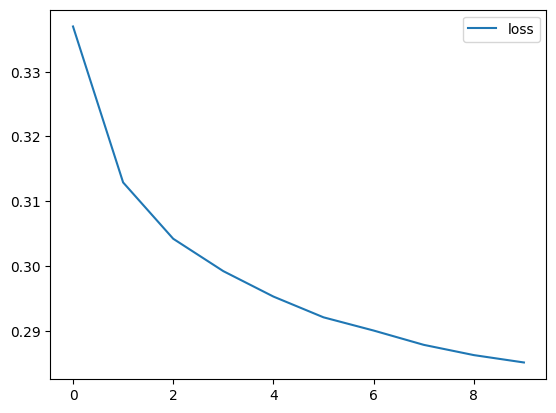

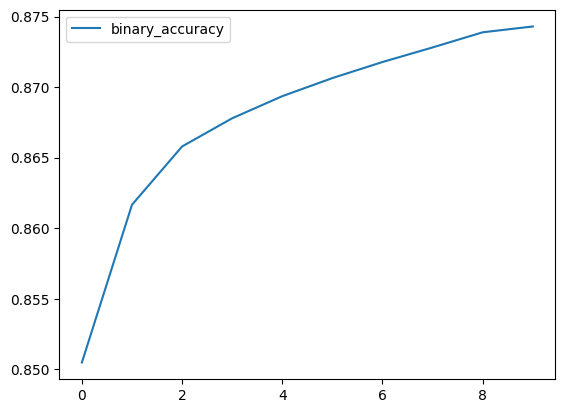

In [25]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss']].plot()
history_frame.loc[:, ['binary_accuracy']].plot();

In [26]:
test_loss, test_acc = modelNN.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

2212/2212 [==============================] - 6s 3ms/step - loss: 0.2701 - binary_accuracy: 0.8803
Test accuracy: 0.8803103566169739


In [27]:
predictions=(modelNN.predict(X_test) > 0.5).astype("int32")

2212/2212 [==============================] - 6s 3ms/step


<Axes: >

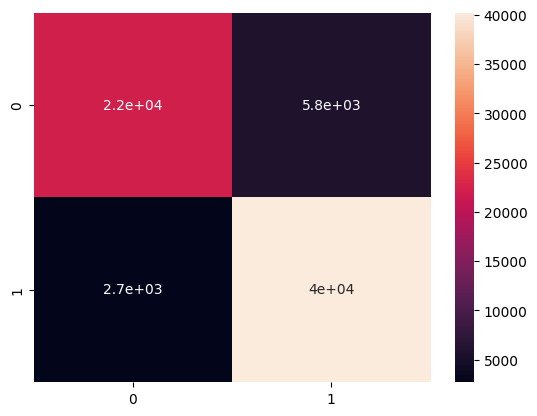

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [35]:
print("Accuracy: ", acc)
print("Precision: ",prec)
print("Recall: ",rec)
print("F1 Score: ", rec)

Accuracy:  0.880310353599593
Precision:  0.87471461807745
Recall:  0.9369526737469722
F1 Score:  0.9369526737469722


In [36]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, predictions)

In [37]:
cr


'              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84     27822\n           1       0.87      0.94      0.90     42936\n\n    accuracy                           0.88     70758\n   macro avg       0.88      0.86      0.87     70758\nweighted avg       0.88      0.88      0.88     70758\n'

In [39]:
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84     27822
           1       0.87      0.94      0.90     42936

    accuracy                           0.88     70758
   macro avg       0.88      0.86      0.87     70758
weighted avg       0.88      0.88      0.88     70758

